# Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from IPython.display import clear_output
from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from smallqnetnoiseML_functions import *

2024-05-07 19:51:52.232201: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 19:51:52.256586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available:  0


In [3]:
# run this if you want to force the not use of the GPU
tf.config.set_visible_devices([], "GPU")

# Loading of datas generated by perfect projective measurements

In [4]:
efficiency_correlated, y_correlated, eta_CN = load_object("../data/data_CN.pkl")

efficiency_anti_correlated, y_anti_correlated, eta_ACN = load_object(
    "../data/data_ACN.pkl"
)

efficiency_uncorrelated, y_uncorrelated, eta_UCN = load_object("../data/data_UCN.pkl")

efficiency_markovian, y_markovian, eta_M = load_object("../data/data_M.pkl")

efficiency_correlated_markovian, y_correlated_markovian, eta_CM = load_object(
    "../data/data_CM.pkl"
)

efficiency_anti_correlated_markovian, y_anti_correlated_markovian, eta_ACM = (
    load_object("../data/data_ACM.pkl")
)

# Making of labeled dataset
# labeled data for quasitatic, correlated noise
labeled_data1 = np.column_stack((efficiency_correlated, y_correlated))
# labeled data for quasitatic, anti correlated noise
labeled_data2 = np.column_stack((efficiency_anti_correlated, y_anti_correlated))
# labeled data for quasitatic, uncorrelated noise
labeled_data3 = np.column_stack((efficiency_uncorrelated, y_uncorrelated))
# labeled data for correlated, Markovian (non quasistatic) noise
labeled_data4 = np.column_stack(
    (efficiency_correlated_markovian, y_correlated_markovian)
)
# labeled data for anti-correlated, Markovian (non quasistatic) noise
labeled_data5 = np.column_stack(
    (efficiency_anti_correlated_markovian, y_anti_correlated_markovian)
)
# labeled data for Markovian (non quasistatic) noise
labeled_data6 = np.column_stack((efficiency_markovian, y_markovian))

data_4noises = [labeled_data1, labeled_data2, labeled_data3, labeled_data6]
data_5noises = [
    labeled_data1,
    labeled_data2,
    labeled_data3,
    labeled_data4,
    labeled_data5,
]

# Analysis of 5 noises

## train the model

In [5]:
(
    train_loss0_MLP_n5,
    train_acc0_MLP_n5,
    val_loss0_MLP_n5,
    val_acc0_MLP_n5,
    history_MLP_n5,
    Net_n5,
    X_test5,
    Y_test5,
) = create_fit_model(data_5noises, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dense_2 (Dense)             (None, 5)                 505       
                                                                 
Total params: 13917 (54.36 KB)
Trainable params: 13917 (54.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Initial accuracy:
16/16 [==============================] - 0s 2ms/step - loss: 1.6152 - accuracy: 0.2000
training...
16/16 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.7940
loss and accuracy on test set: [0.3647353947162628, 0.7940000295639038]


In [6]:
# # save history
# save_object(
#     [train_loss0_MLP_n5, train_acc0_MLP_n5, val_loss0_MLP_n5, val_acc0_MLP_n5, history_MLP_n5],
#     "../data/ML_history_noise5_new.pkl",
# )
# # save weights
# Net_n5.save_weights("../data/weights/model_4noises_weights_new")

## or load paper model

In [12]:
# get test set
np.random.seed(1357)
X_test5, Y_test5, X_val5, Y_val5, X_train5, Y_train5 = make_balanced_data(data_5noises)

# load history for 5 noises
(
    train_loss0_MLP_n5,
    train_acc0_MLP_n5,
    val_loss0_MLP_n5,
    val_acc0_MLP_n5,
    history_MLP_n5,
) = load_object("../data/ML_history_noise5.pkl")

In [13]:
Net_n5 = create_model(5)
Net_n5.load_weights("../data/weights/model_5noises_weights")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               512       
                                                                 
 dense_7 (Dense)             (None, 100)               12900     
                                                                 
 dense_8 (Dense)             (None, 5)                 505       
                                                                 
Total params: 13917 (54.36 KB)
Trainable params: 13917 (54.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
# The model weights (that are considered the best) are loaded into the model.
Y_predict_MLP = Net_n5.evaluate(X_test5, Y_test5)
Y_predict_MLP

16/16 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8060


[0.32366183400154114, 0.8059999942779541]

# Analysis of 4 noises

## train the model

In [7]:
(
    train_loss0_MLP_n4,
    train_acc0_MLP_n4,
    val_loss0_MLP_n4,
    val_acc0_MLP_n4,
    history_MLP_n4,
    Net_n4,
    X_test4,
    Y_test4,
) = create_fit_model(data_4noises, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 100)               12900     
                                                                 
 dense_5 (Dense)             (None, 4)                 404       
                                                                 
Total params: 13816 (53.97 KB)
Trainable params: 13816 (53.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Initial accuracy:
13/13 [==============================] - 0s 3ms/step - loss: 1.3855 - accuracy: 0.2500
training...
13/13 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9850
loss and accuracy on test set: [0.0729353278875351, 0.9850000143051147]


In [8]:
# # save history
# save_object(
#     [train_loss0_MLP_n4, train_acc0_MLP_n4, val_loss0_MLP_n4, val_acc0_MLP_n4, history_MLP_n4],
#     "../data/ML_history_noise4_new.pkl",
# )
# # save weights
# Net_n4.save_weights("../data/weights/model_4noises_weights_new")

## or load paper model

In [15]:
# get test set
np.random.seed(1357)
X_test4, Y_test4, X_val4, Y_val4, X_train4, Y_train4 = make_balanced_data(data_4noises)

# load history for 4 noise
(
    train_loss0_MLP_n4,
    train_acc0_MLP_n4,
    val_loss0_MLP_n4,
    val_acc0_MLP_n4,
    history_MLP_n4,
) = load_object("../data/ML_history_noise4.pkl")

In [16]:
Net_n4 = create_model(4)
Net_n4.load_weights("../data/weights/model_4noises_weights")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               512       
                                                                 
 dense_10 (Dense)            (None, 100)               12900     
                                                                 
 dense_11 (Dense)            (None, 4)                 404       
                                                                 
Total params: 13816 (53.97 KB)
Trainable params: 13816 (53.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
# The model weights (that are considered the best) are loaded into the model.
Y_predict_MLP = Net_n4.evaluate(X_test4, Y_test4)
Y_predict_MLP

13/13 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9950


[0.07542841136455536, 0.9950000047683716]

# Plots

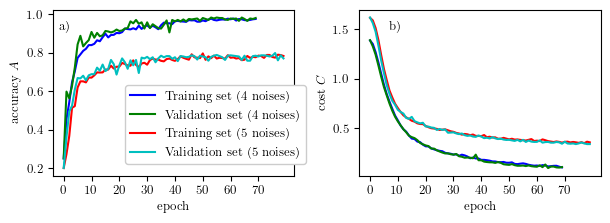

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(6.1780, 2.3))

# 4 noise
ax[0].set_xticks(np.arange(len(history_MLP_n4.history["accuracy"]) + 1, step=10))
ax[0].plot(
    np.arange(1 + len(history_MLP_n4.history["accuracy"])),
    [train_acc0_MLP_n4] + history_MLP_n4.history["accuracy"],
    ls="-",
)
ax[0].plot(
    np.arange(1 + len(history_MLP_n4.history["val_accuracy"])),
    [val_acc0_MLP_n4] + history_MLP_n4.history["val_accuracy"],
    ls="-",
)

# 5 noise
ax[0].set_xticks(np.arange(len(history_MLP_n5.history["accuracy"]) + 1, step=10))
ax[0].plot(
    np.arange(1 + len(history_MLP_n5.history["accuracy"])),
    [train_acc0_MLP_n5] + history_MLP_n5.history["accuracy"],
    ls="-",
)
ax[0].plot(
    np.arange(1 + len(history_MLP_n5.history["val_accuracy"])),
    [val_acc0_MLP_n5] + history_MLP_n5.history["val_accuracy"],
    ls="-",
)

# ax[0].set_title('model accuracy')
ax[0].set_ylabel("accuracy $A$")
ax[0].set_xlabel("epoch")
# Create a first legend.
ax[0].legend(
    [
        "Training set (4 noises)",
        "Validation set (4 noises)",
        "Training set (5 noises)",
        "Validation set (5 noises)",
    ],
    loc=(0.3, 0.07),
    framealpha=1,
)

# 4 noise
ax[1].set_xticks(np.arange(len(history_MLP_n4.history["loss"]) + 1, step=10))
ax[1].plot(
    np.arange(1 + len(history_MLP_n4.history["loss"])),
    [train_loss0_MLP_n4] + history_MLP_n4.history["loss"],
    ls="-",
)
ax[1].plot(
    np.arange(1 + len(history_MLP_n4.history["val_loss"])),
    [val_loss0_MLP_n4] + history_MLP_n4.history["val_loss"],
    ls="-",
)
# ax[1].set_title('model loss')
# 5 noise
ax[1].set_xticks(np.arange(len(history_MLP_n5.history["loss"]) + 1, step=10))
ax[1].plot(
    np.arange(1 + len(history_MLP_n5.history["loss"])),
    [train_loss0_MLP_n5] + history_MLP_n5.history["loss"],
    ls="-",
)
ax[1].plot(
    np.arange(1 + len(history_MLP_n5.history["val_loss"])),
    [val_loss0_MLP_n5] + history_MLP_n5.history["val_loss"],
    ls="-",
)

ax[1].set_ylabel(r"cost $C$")
ax[1].set_xlabel("epoch")
# ax[1].legend(['Training set (4 noises)', 'Validation set (4 noises)', 'Training set (5 noises)', 'Validation set (5 noises)'], loc='upper right')


ax[0].text(
    0.05,
    0.9,
    "a)",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax[0].transAxes,
)
ax[1].text(
    0.15,
    0.9,
    "b)",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax[1].transAxes,
)


fig.tight_layout(w_pad=-1)

In [19]:
Y_pred5 = Net_n5.predict(X_test5)
Y_pred5_classes = np.argmax(Y_pred5, axis=1)  # Convert predictions to class labels

# Compute the confusion matrix
conf_matrix5 = confusion_matrix(Y_test5, Y_pred5_classes)

Y_pred4 = Net_n4.predict(X_test4)
Y_pred4_classes = np.argmax(Y_pred4, axis=1)  # Convert predictions to class labels

# Compute the confusion matrix
conf_matrix4 = confusion_matrix(Y_test4, Y_pred4_classes)

13/13 [==============================] - 0s 1ms/step


Text(-0.17, 0.9, 'b)')

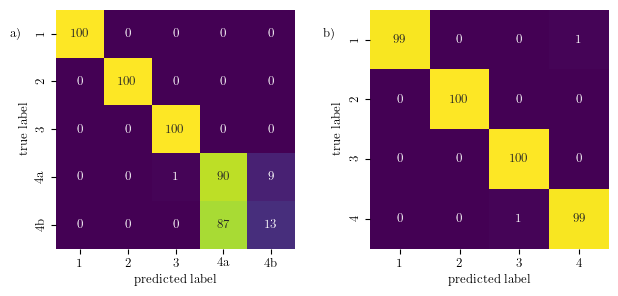

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6.17, 3))
ticklabels4 = ["1", "2", "3", "4"]
ticklabels = ["1", "2", "3", "4a", "4b"]

sns.heatmap(
    conf_matrix5,
    annot=True,
    fmt="d",
    vmin=0,
    vmax=100,
    cmap="viridis",
    xticklabels=ticklabels,
    yticklabels=ticklabels,
    square=True,
    cbar=False,
    ax=ax1,
)

sns.heatmap(
    conf_matrix4,
    annot=True,
    fmt="d",
    vmin=0,
    vmax=100,
    cmap="viridis",
    xticklabels=ticklabels4,
    yticklabels=ticklabels4,
    square=True,
    cbar=False,
    ax=ax2,
)

ax1.set_xlabel("predicted label")
ax1.set_ylabel("true label")
ax2.set_xlabel("predicted label")
ax2.set_ylabel("true label")
# Create a single colorbar for the heatmaps
# Calculate the min and max across both datasets for a unified color scale
vmin = 0
vmax = 100
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

fig.tight_layout(w_pad=3)

ax1.text(
    -0.17,
    0.9,
    "a)",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax1.transAxes,
)
ax2.text(
    -0.17,
    0.9,
    "b)",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax2.transAxes,
)

# Finite no. of projective measurements

In [4]:
# S_ are arrays of dimension (500,3,5000) where 500 is no.of rows defining total no. of samples
# 3 -> no. of coloumns defing lists of 0/1 (experimental outcomes) for Ωp_max = Ωs_max, Ωp_max > Ωs_max, Ωp_max < Ωs_max,
# 5000 -> length of each list or number of trajectories

In [4]:
efficiency_correlated, y_correlated, eta_CN, S_CN = load_object("../data/dataE_CN.pkl")

efficiency_anti_correlated, y_anti_correlated, eta_ACN, S_ACN = load_object(
    "../data/dataE_ACN.pkl"
)

efficiency_uncorrelated, y_uncorrelated, eta_UCN, S_UCN = load_object(
    "../data/dataE_UCN.pkl"
)

efficiency_non_quasistaic, y_non_quasistaic, eta_NQS, S_NQS = load_object(
    "../data/dataE_M.pkl"
)

In [5]:
np.array(S_NQS).shape

(500, 3, 5000)

## Change of accuracy with increasing number of trajectories

In [7]:
num_trajectories = np.arange(10, 5000 + 10, 100)
accuracy = []
# utils.set_random_seed(135711)
Net = create_model(4)
for trajs in num_trajectories:
    clear_output(wait=True)
    accuracy += [training_finite(Net, S_CN, S_ACN, S_UCN, S_NQS, trajs)]
    print(f"number of measurements: {trajs}")
print("finished")

13/13 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9925
number of measurement: 4910
finished


In [29]:
# save_object(
#     [accuracy, num_trajectories], "../data/accuracy_with_num_trajectories.pkl"
# )

In [37]:
accuracy, num_trajectories = load_object("../data/accuracy_with_num_trajectories.pkl")

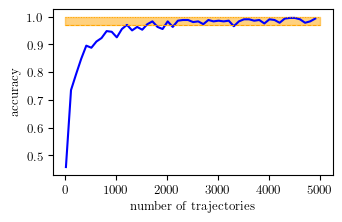

In [8]:
x = [0, 5000]
y1 = [0.97, 0.97]
y2 = [1.0, 1.0]

fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.3))
ax.plot(num_trajectories, accuracy)
ax.fill_between(x, y1, y2, color="orange", alpha=0.5)
ax.plot(x, y1, color="orange", linewidth=0.7)
ax.plot(x, y2, color="orange", linewidth=0.7)
ax.set_ylabel("accuracy")
ax.set_xlabel("number of trajectories")
# ax.legend()
# ax.grid(True)
fig.tight_layout()